## Problem statement


#### Forecasting passenger count for airlines from the given dataset


In [1]:
## Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [2]:
## Loading data set

airlines=pd.read_excel('Airlines+Data.xlsx')

In [3]:
airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
airlines.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [5]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
airlines.isnull().sum()

Month         0
Passengers    0
dtype: int64

<AxesSubplot:>

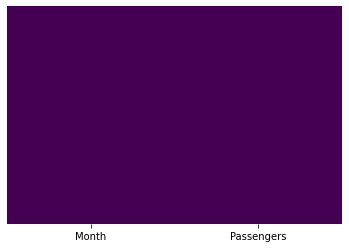

In [7]:
sns.heatmap(airlines.isna(),cmap='viridis',cbar=False,yticklabels=False)

In [8]:
airlines[airlines.duplicated()].shape

(0, 2)

In [9]:
## Summary statistics

airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


<AxesSubplot:>

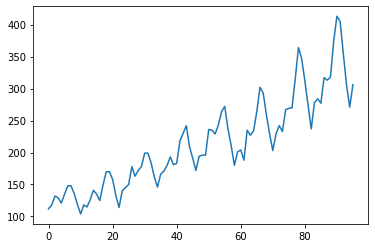

In [10]:
airlines.Passengers.plot()

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Passengers'>

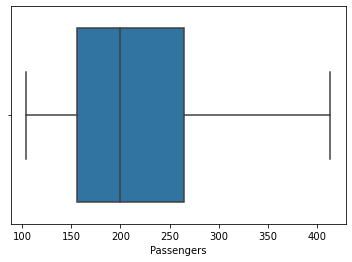

In [11]:
sns.boxplot(airlines.Passengers)

C:\Users\samee\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


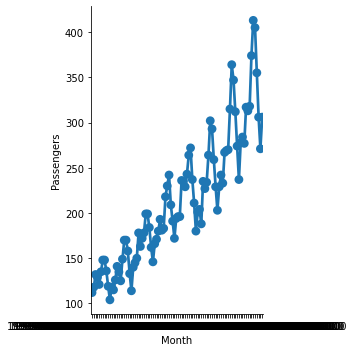

In [12]:
sns.factorplot("Month","Passengers",data=airlines)

## Data Driven Models

### Moving Averages

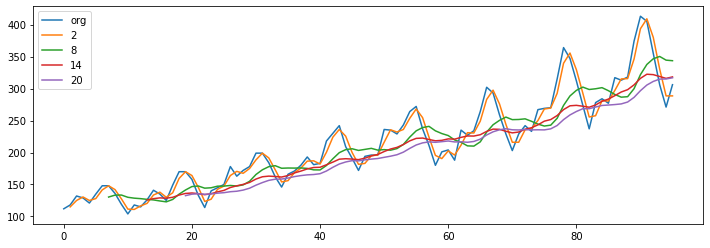

In [13]:
plt.figure(figsize=(12,4))
airlines.Passengers.plot(label='org')
for i in range(2,24,6):
    airlines['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')    

## Time series decomposition plot

C:\Users\samee\AppData\Local\Temp/ipykernel_10696/2003904364.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add=seasonal_decompose(airlines.Passengers,freq=12,model='additive')


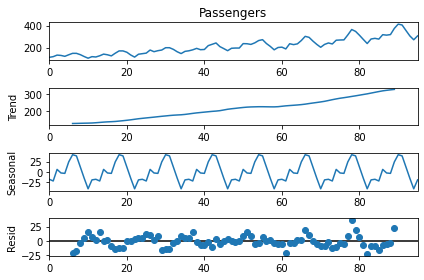

In [14]:
decompose_ts_add=seasonal_decompose(airlines.Passengers,freq=12,model='additive')
decompose_ts_add.plot()
plt.show()

C:\Users\samee\AppData\Local\Temp/ipykernel_10696/4035286717.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add=seasonal_decompose(airlines.Passengers,freq=12,model='multiplicative')


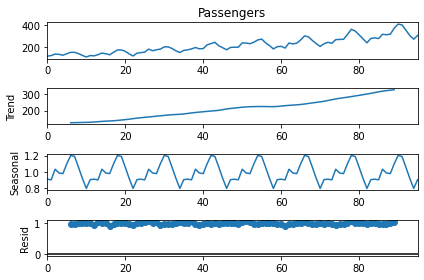

In [15]:
decompose_ts_add=seasonal_decompose(airlines.Passengers,freq=12,model='multiplicative')
decompose_ts_add.plot()
plt.show()

## ACF and PACF Plots

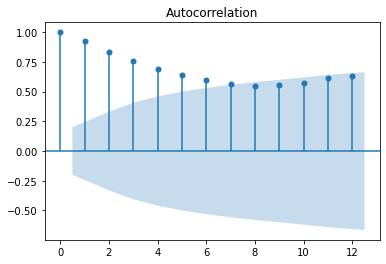

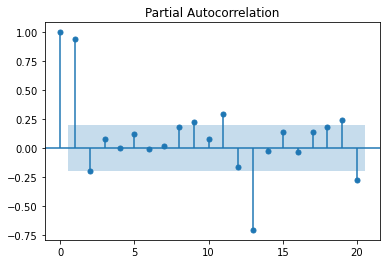

In [16]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(airlines.Passengers,lags=12)
tsa_plots.plot_pacf(airlines.Passengers)
plt.show()

## Splitting data into train and test


In [17]:
train=airlines.head(70)
test=airlines.tail(26)

### Evaluation Metric MAPE

In [18]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [19]:
ses_model=SimpleExpSmoothing(train['Passengers']).fit()
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test.Passengers)

C:\Users\samee\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


22.076256764951356

## Holt Method

In [20]:
hw_model = Holt(train["Passengers"]).fit()
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Passengers)

15.41799357622358

### Holts winter exponential smoothing with additive seasonality and additive trend


In [21]:
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Passengers) 

10.80194843580534

### Holts winter exponential smoothing with multiplicative seasonality and additive trend


In [22]:
hwe_model_mul_add=ExponentialSmoothing(train['Passengers'],seasonal='mul',
                                      trend='add',seasonal_periods=12).fit()
pred_hwe_mul_add=hwe_model_mul_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)

9.102898246943349

## Final Model by combining train and test


In [23]:
hwe_model_add_add = ExponentialSmoothing(airlines["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model


### Forecasting 10 future values

In [24]:
hwe_model_add_add.forecast(10)

96     319.235284
97     311.528413
98     350.278738
99     346.985064
100    351.845130
101    403.925766
102    440.566807
103    427.446405
104    376.628081
105    329.767444
dtype: float64

In [25]:
hwe_model_add_add.params

{'smoothing_level': 0.25465096677759974,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': 0.7453490332224002,
 'damping_trend': nan,
 'initial_level': 175.8862045205537,
 'initial_trend': 2.3328384315692254,
 'initial_seasons': array([-66.22063198, -60.62097066, -48.14661065, -53.41986225,
        -62.18508297, -48.08588492, -35.87370184, -38.30087523,
        -52.43139355, -71.23316601, -85.67073639, -69.06058726]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

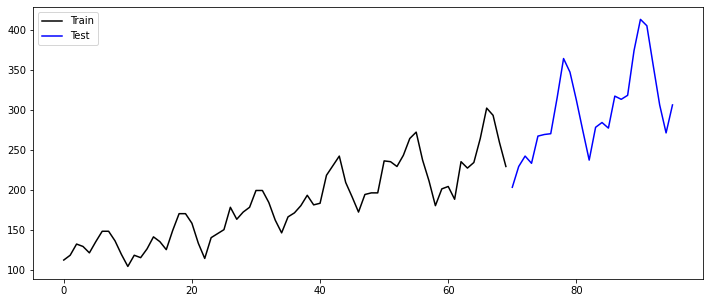

In [26]:
plt.figure(figsize=(12,5))

plt.plot(train.index, train["Passengers"], label='Train',color="black")

plt.plot(test.index, test["Passengers"], label='Test',color="blue")
plt.legend(loc='best')


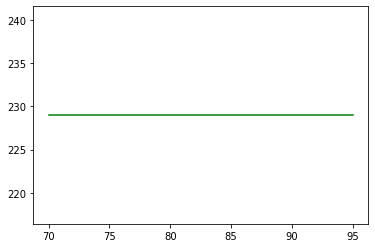

In [27]:
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")


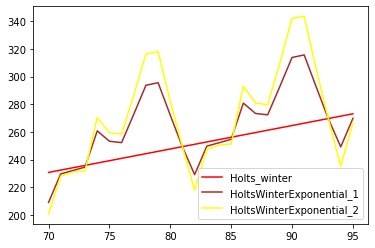

In [28]:
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')

## Model Based Methods

In [29]:
airlines['Date']=pd.to_datetime(airlines['Month'],format='%b-%y')
## Look for c standard format codes
airlines

,Month,Passengers,Date
0,1995-01-01,112,1995-01-01
1,1995-02-01,118,1995-02-01
2,1995-03-01,132,1995-03-01
3,1995-04-01,129,1995-04-01
4,1995-05-01,121,1995-05-01
...,...,...,...
91,2002-08-01,405,2002-08-01
92,2002-09-01,355,2002-09-01
93,2002-10-01,306,2002-10-01
94,2002-11-01,271,2002-11-01


### Extracting Day, weekday name, month name, year from the Date column using Date functions from pandas


In [30]:
airlines['month']=airlines.Date.dt.strftime("%b")## month extraction
airlines['year']=airlines.Date.dt.strftime("%y") ## year extraction

In [31]:
airlines

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,95
1,1995-02-01,118,1995-02-01,Feb,95
2,1995-03-01,132,1995-03-01,Mar,95
3,1995-04-01,129,1995-04-01,Apr,95
4,1995-05-01,121,1995-05-01,May,95
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,02
92,2002-09-01,355,2002-09-01,Sep,02
93,2002-10-01,306,2002-10-01,Oct,02
94,2002-11-01,271,2002-11-01,Nov,02


In [32]:
t =np.arange(1,97)
airlines['t']=t
airlines['t_square']=airlines['t']*airlines['t']

In [33]:
airlines['log_Passengers']=np.log(airlines['Passengers'])


In [34]:
airlines.head()

,Month,Passengers,Date,month,year,t,t_square,log_Passengers
0,1995-01-01,112,1995-01-01,Jan,95,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,95,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,95,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,95,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,95,5,25,4.795791


In [35]:
airlines=pd.get_dummies(airlines,columns=['month'])
airlines

,Month,Passengers,Date,year,t,t_square,log_Passengers,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995-01-01,95,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,95,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,95,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,95,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,95,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,02,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002-09-01,02,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002-10-01,02,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002-11-01,02,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


### Splitting into train and test


In [36]:
train = airlines.head(70)
test = airlines.tail(26)

#### Linear Model

In [37]:
linear=smf.ols('Passengers~t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Passengers'])-np.array(predlin))**2))
rmselin

17.681879908211886

### Quadratic model


In [38]:
quad=smf.ols('Passengers~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predquad))**2))
rmsequad

43.89814496742656

### Exponential model


In [39]:
expo=smf.ols('log_Passengers~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

43.47847070446902

In [40]:
## Additive seasonality

additive = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predadd = pd.Series(additive.predict(test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))
rmseadd = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predadd))**2))
rmseadd

124.97569951828818

In [41]:
### Additive seasonality with linear trend

addlinear = smf.ols('Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predaddlinear = pd.Series(addlinear.predict(test[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmseaddlinear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

34.50208979427133

In [42]:
### Additive seasonality with quadratic trend

addquad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predaddquad = pd.Series(addquad.predict(test[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmseaddquad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

30.393042895923372

In [43]:
## Multiplicative seasonality

mulsea = smf.ols('log_Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predmul = pd.Series(mulsea.predict(test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmsemul=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predmul))**2))
rmsemul

298.6798189957354

In [44]:
## Multiplicative seasonality with linear trend

mullin = smf.ols('log_Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predmullin = pd.Series(mullin.predict(test[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmsemulin=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predmullin))**2))
rmsemulin

298.1366141717154

In [45]:
## Multiplicative seasonality with quadratic trend

mul_quad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
pred_mul_quad = pd.Series(mul_quad.predict(test[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmse_mul_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_mul_quad))**2))
rmse_mul_quad

30.393042895923372

## Tabulating the RMSE values for comparison


In [46]:
data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['Values'])

,Model,Values
5,rmselin,17.681880
0,rmse_mul_quad,30.393043
3,rmseaddquad,30.393043
2,rmseaddlinear,34.502090
4,rmseexpo,43.478471
8,rmsequad,43.898145
1,rmseadd,124.975700
7,rmsemulin,298.136614
6,rmsemul,298.679819


#### We could see that the Linear model shows the least RMSE value, so it is the most suitable model for our data
